In [1]:
%load_ext autoreload
%autoreload 2

from ETL import *

In [2]:
s1 = Sensor(42.5, 22)
s2 = Sensor(42.5, 22)
s2.move_to(10, 20)
p1 = s1.getPolygon()
p2 = s2.getPolygon()

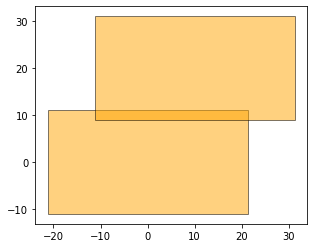

In [3]:
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

plt.axis('scaled')
plt.show()

1743.0


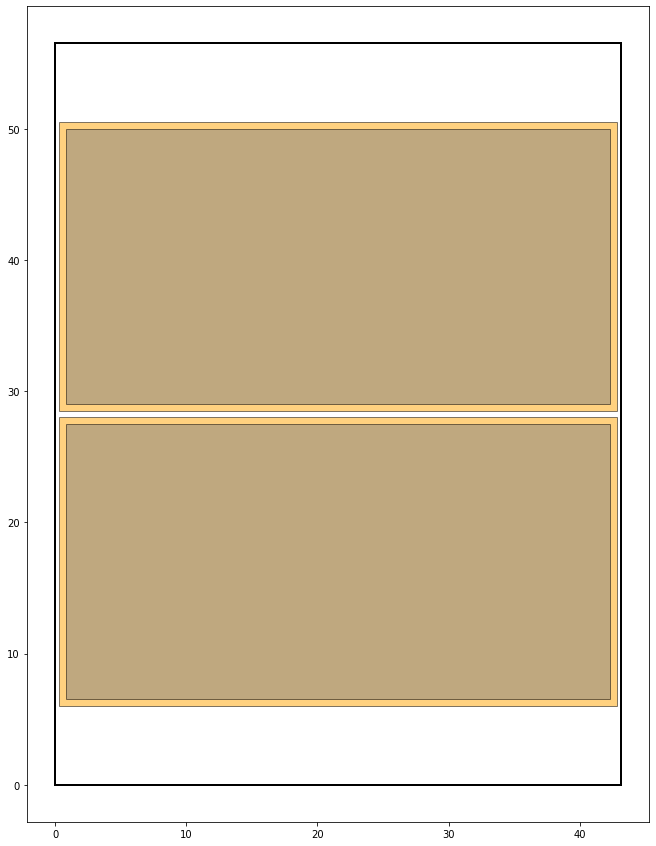

In [4]:
# Current modules
sensor_x = (42.5)

s = Sensor(sensor_x, 22)
m = Module(43.10, 56.50, n_sensor_x=1, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=sensor_x+0.1)
m.populate(s)

m.move_by(-m.x1,-m.y1)

plt.rcParams['figure.figsize'] = [15, 15]

pm = m.getPolygon()
plt.gca().add_patch(pm)

for sen in m.sensors:
    plt.gca().add_patch(sen.getPolygon())
    plt.gca().add_patch(sen.getPolygon(active=True))

print ( m.getActiveArea() )
    
plt.axis('scaled')
plt.show()

1743.0


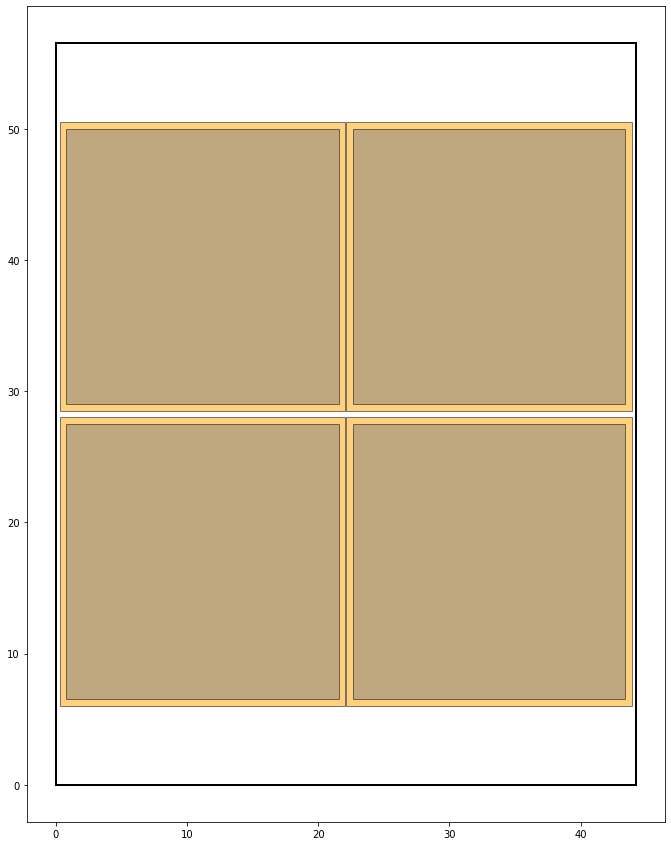

In [5]:
# the new modules could look like this:
sensor_x = (42.5/2 + 0.5)

s = Sensor(sensor_x, 22)
m = Module(44.20, 56.50, n_sensor_x=2, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=sensor_x+0.1)
m.populate(s)

m.move_by(-m.x1,-m.y1)

plt.rcParams['figure.figsize'] = [15, 15]

pm = m.getPolygon()
plt.gca().add_patch(pm)

for sen in m.sensors:
    plt.gca().add_patch(sen.getPolygon())
    plt.gca().add_patch(sen.getPolygon(active=True))

print ( m.getActiveArea() )
    
plt.axis('scaled')
plt.show()

871.5


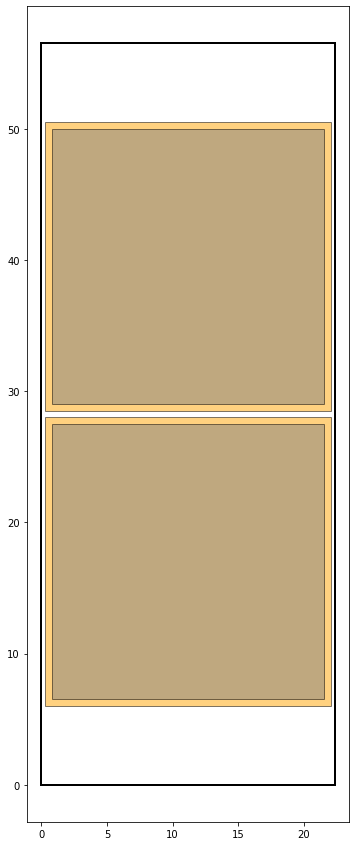

In [6]:
# the small modules could look like this:
sensor_x = (42.5/2 + 0.5)

s = Sensor(sensor_x, 22)
m = Module(42.5/2 + 0.5 + 0.6, 56.50, n_sensor_x=1, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=sensor_x+0.1)
m.populate(s)

m.move_by(-m.x1,-m.y1)

plt.rcParams['figure.figsize'] = [15, 15]

pm = m.getPolygon()
plt.gca().add_patch(pm)

for sen in m.sensors:
    plt.gca().add_patch(sen.getPolygon())
    plt.gca().add_patch(sen.getPolygon(active=True))

print ( m.getActiveArea() )
    
plt.axis('scaled')
plt.show()

In [18]:
20.75 * 21 *2

871.5

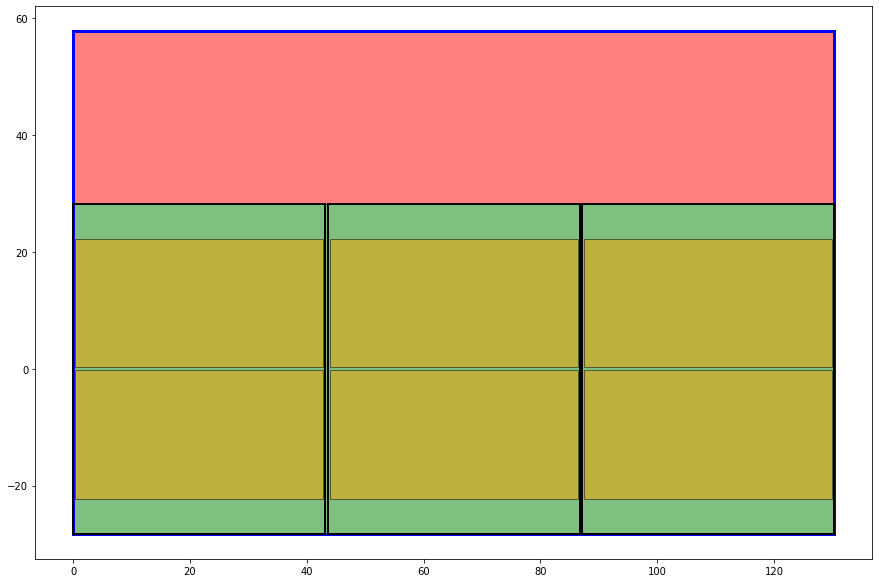

In [143]:
largeSensor = True

if largeSensor:
    s = Sensor(42.5, 22)
    m = Module(43.10, 56.50, n_sensor_x=1, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=42.5+0.1)
    m.populate(s)
else:
    # the new modules could look like this:
    sensor_x = (42.5/2 + 0.5)
    s = Sensor(sensor_x, 22)
    m = Module(44.20, 56.50, n_sensor_x=2, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=sensor_x+0.1)
    m.populate(s)

rb = ReadoutBoard(10,56.5, color='green')
pb = ReadoutBoard(10,29.5, color='red')

SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

#SM.move_by(-SM.x1, -SM.y1)
SM.centerModule()
#SM.centerPB()

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(SM.RB.getPolygon())
plt.gca().add_patch(SM.PB.getPolygon())
plt.gca().add_patch(SM.getPolygon())
    
for mods in SM.modules:
    plt.gca().add_patch(mods.getPolygon())
    for sens in mods.sensors:
        plt.gca().add_patch(sens.getPolygon())
        
plt.axis('scaled')
plt.show()

In [144]:
SM.x2

130.3

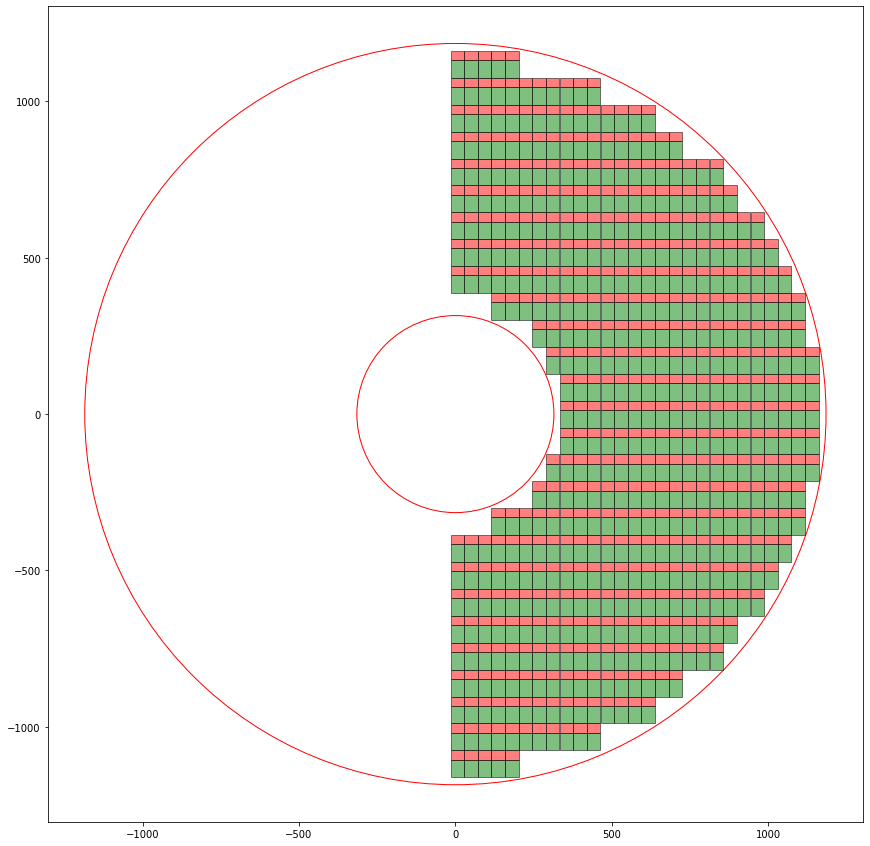

In [146]:
inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

D = Dee(315, 1185)
D.populate(SM)

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

for slot in D.slots_flat:
    #plt.gca().add_patch(slot.getPolygon())
    plt.gca().add_patch(slot.RB.getPolygon())
    plt.gca().add_patch(slot.PB.getPolygon())

plt.savefig('test.pdf')
        
plt.axis('scaled')
plt.show()


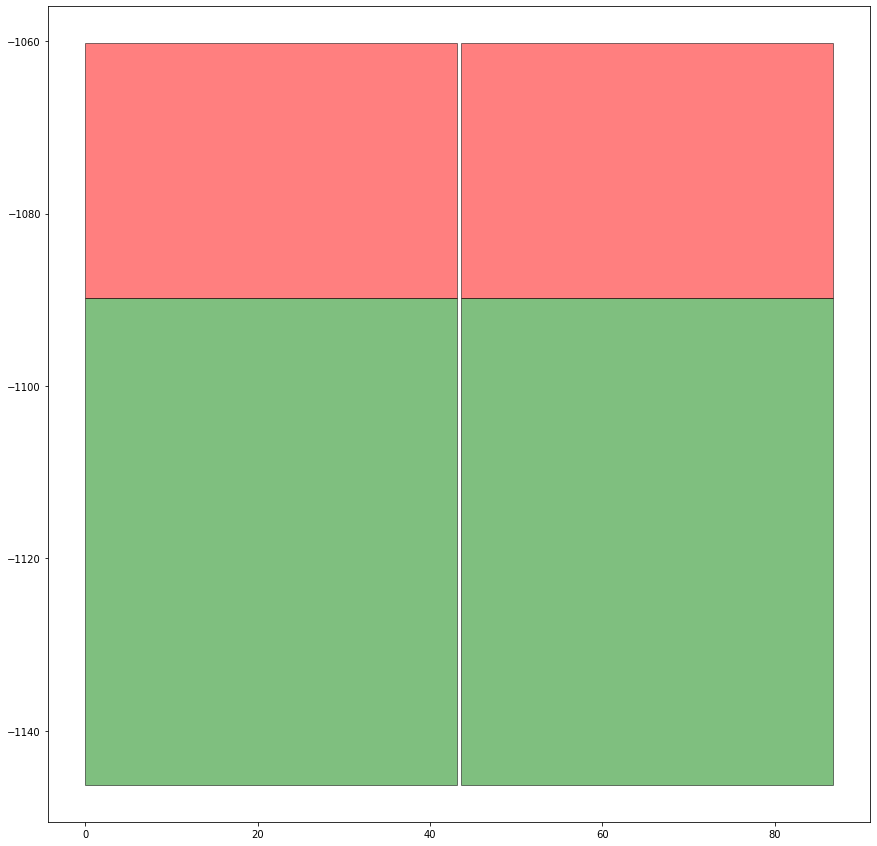

In [149]:
largeSensor = True

if largeSensor:
    s = Sensor(42.5, 22)
    m = Module(43.10, 56.50, n_sensor_x=1, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=42.5+0.1)
    m.populate(s)
else:
    # the new modules could look like this:
    sensor_x = (42.5/2 + 0.5)
    s = Sensor(sensor_x, 22)
    m = Module(44.20, 56.50, n_sensor_x=2, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=sensor_x+0.1)
    m.populate(s)

rb = ReadoutBoard(10,56.5, color='green')
pb = ReadoutBoard(10,29.5, color='red')

SM = SuperModule(m, pb, rb, n_modules=1, orientation='above')

SM.move_by(-SM.x1, -SM.y1)
#SM.centerModule()

D = Dee(315, 1185)
D.populate(SM, edge_x=0, center_RB=True)

plt.rcParams['figure.figsize'] = [15, 15]

for slot in D.slots_flat[:2]:
    #plt.gca().add_patch(slot.getPolygon())
    plt.gca().add_patch(slot.RB.getPolygon())
    plt.gca().add_patch(slot.PB.getPolygon())

plt.axis('scaled')
plt.show()

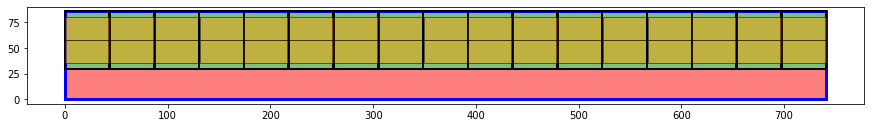

In [150]:
SM_small = SuperModule.fromSuperModule(SM, n_modules=17, orientation='below')

SM_small.move_by(-SM_small.x1, -SM_small.y1)

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(SM_small.RB.getPolygon())
plt.gca().add_patch(SM_small.PB.getPolygon())
plt.gca().add_patch(SM_small.getPolygon())
    
for mods in SM_small.modules:
    plt.gca().add_patch(mods.getPolygon())
    for sens in mods.sensors:
        plt.gca().add_patch(sens.getPolygon())
        
plt.axis('scaled')
plt.show()
